Task 1: Data Understanding and Visualization:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


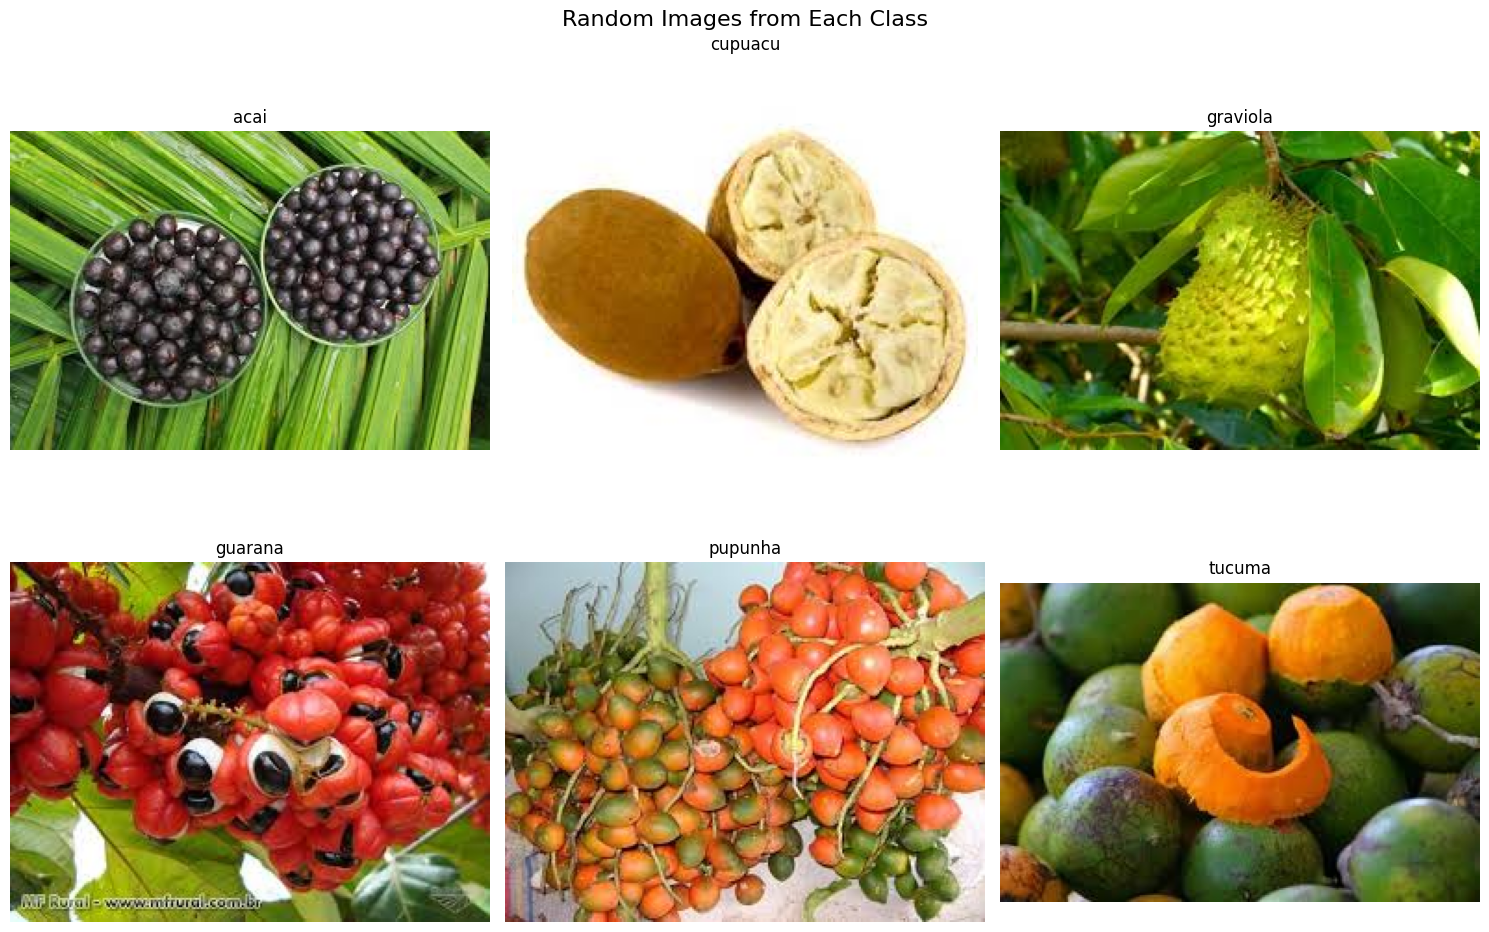

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the train directory path
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_dirs.sort()  # Sort for consistent order
print(f"Found {len(class_dirs)} classes: {class_dirs}")

# Select one random image from each class
images = []
class_names = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Ensure there’s at least one image
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(image_path)
        class_names.append(class_dir)

# Check if we have images to display
if not images:
    raise ValueError("No images found in the dataset!")

# Display images in a 2-row grid
rows = 2
cols = (len(images) + 1) // 2  # Ceiling division to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size as needed
fig.suptitle("Random Images from Each Class", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each image
for i, (image_path, class_name) in enumerate(zip(images, class_names)):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Hide axes

# Hide any unused subplots (if odd number of classes)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

What did you Observe?

-> It is randomly picking images so each time we run the code different images are being displayed in the output.

In [ ]:
from PIL import Image

train_dir = '/content/drive/MyDrive/FruitinAmazon/train'

#function for checking and femoving corrupted images

def check_and_remove_corrupted_images(folder_path):
  corrupted_images = []

  #Iterate through subdirectories of class
  for class_dir in os.listdir(folder_path):
    class_path = os.path.join(folder_path, class_dir)
    if os.path.isdir(class_path):
      for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        try:
          #Tries to open the image
          with Image.open(image_path) as img:
            img.verify() #verifies if image is not corrupted
        except (IOError, SyntaxError):
          #Add corrupted images to the list and remove it
          corrupted_images.append(image_path)
          os.remove(image_path)
          print(f"Removed corrupted Images: {image_path}")

  if corrupted_images:
    print(f"Total corrupted images removed: {len(corrupted_images)}")
  else:
    print("No corrupted images found")


check_and_remove_corrupted_images(train_dir)

No corrupted images found


Task 2: Loading and Preprocessing Image Data in keras:

In [ ]:
import tensorflow as tf

test_dir = '/content/drive/MyDrive/FruitinAmazon/test'
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
    )
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=16,
    label_mode='categorical',
    shuffle=False
)

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
    )
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_directories), activation='softmax')  # Number of classes
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

TASK 4: Compile the Model

In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])



Training the model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping and ModelCheckpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.1505 - loss: 1.8850

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - accuracy: 0.1476 - loss: 1.8963 - val_accuracy: 0.0556 - val_loss: 2.7524
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.2998 - loss: 1.9489

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.3012 - loss: 1.9405 - val_accuracy: 0.0556 - val_loss: 1.8479
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.2407 - loss: 1.6963

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - accuracy: 0.2361 - loss: 1.6969 - val_accuracy: 0.0556 - val_loss: 1.7970
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.2234 - loss: 1.6190

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step - accuracy: 0.2335 - loss: 1.6114 - val_accuracy: 0.2778 - val_loss: 1.6958
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5064 - loss: 1.4131

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.4978 - loss: 1.4147 - val_accuracy: 0.5000 - val_loss: 1.4066
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.6082 - loss: 1.2421

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 0.6194 - loss: 1.2299 - val_accuracy: 0.4444 - val_loss: 1.2204
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7106 - loss: 0.9455

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.7066 - loss: 0.9470 - val_accuracy: 0.5556 - val_loss: 1.0997
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.7266 - loss: 0.8155 - val_accuracy: 0.6667 - val_loss: 1.1309
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.8009 - loss: 0.6132

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 885ms/step - accuracy: 0.7951 - loss: 0.6251 - val_accuracy: 0.5000 - val_loss: 0.8816
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.7442 - loss: 0.7938

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 584ms/step - accuracy: 0.7491 - loss: 0.7866 - val_accuracy: 0.6111 - val_loss: 0.8567
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.8898 - loss: 0.3942 - val_accuracy: 0.7222 - val_loss: 1.1351
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.9352 - loss: 0.3196

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 583ms/step - accuracy: 0.9340 - loss: 0.3290 - val_accuracy: 0.8333 - val_loss: 0.6767
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9751 - loss: 0.2261

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.9744 - loss: 0.2233 - val_accuracy: 0.7778 - val_loss: 0.5245
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.9518 - loss: 0.1897 - val_accuracy: 0.7778 - val_loss: 0.5722
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - accuracy: 1.0000 - loss: 0.1111 - val_accuracy: 0.8333 - val_loss: 0.6513
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - accuracy: 1.0000 - loss: 0.0774 - val_accuracy: 0.8333 - val_loss: 0.6987
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 465ms/step - accuracy: 1.0000 - loss: 0.0411 - val_accuracy: 0.8889 - val_loss: 0.5677
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0255

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 582ms/step - accuracy: 1.0000 - loss: 0.0248 - val_accuracy: 0.8889 - val_loss: 0.4083
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.8889 - val_loss: 0.4088
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.8333 - val_loss: 0.4580
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 674ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8333 - val_loss: 0.4703
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8333 - val_loss: 0.4215
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 0.0022

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 584ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8889 - val_loss: 0.3806
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.0018

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8889 - val_loss: 0.3728
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8889 - val_loss: 0.3926
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8889 - val_loss: 0.4248
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 800ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8889 - val_loss: 0.4561
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 1.0000 - loss: 7.4195e-04 - val_accuracy: 0.8889 - val_loss: 0.4791
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 1.0000 - loss: 6.8837e-04 - val_accuracy: 0.8889 - val_loss: 0.4917


Evaluate the model

In [ ]:
# Assuming you have test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.8889 - loss: 0.4917
Test Accuracy: 0.8888888955116272


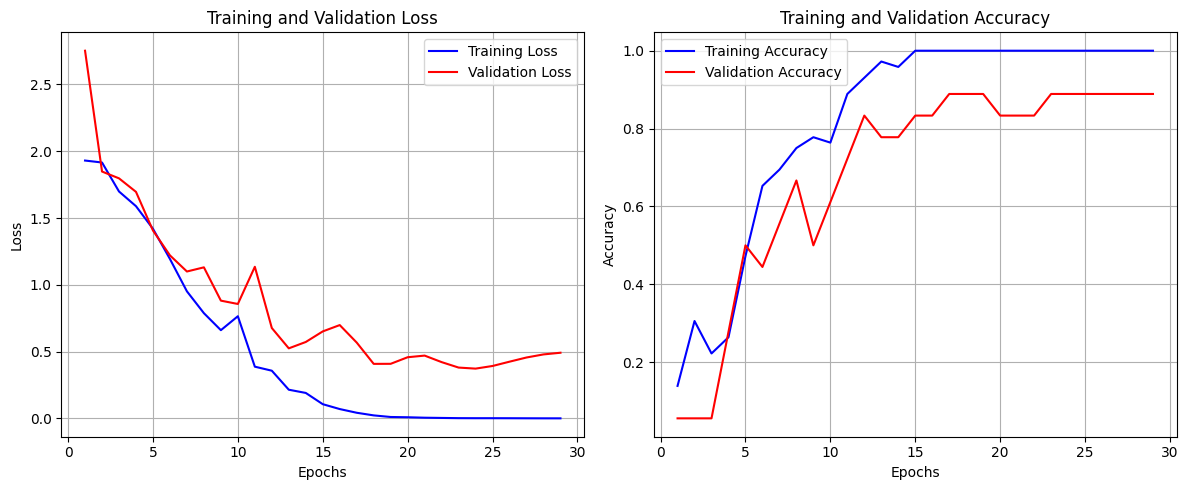

In [ ]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Create subplots: 1 row, 2 columns
plt.figure(figsize=(12, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('final_model.h5')

# Load the saved model
loaded_model = keras.models.load_model('final_model.h5')



In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import classification_report
loaded_model = keras.models.load_model('final_model.h5')
print("Model loaded for predictions")

# Collect all test images and labels
all_images = []
all_labels = []
for images, labels in test_dataset:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())

# Concatenate batches into single arrays
test_images = np.concatenate(all_images, axis=0)  # Shape: (30, 128, 128, 3)
test_labels_onehot = np.concatenate(all_labels, axis=0)  # Shape: (30, 6)

# Make predictions
predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_labels = np.argmax(test_labels_onehot, axis=1)  # Convert one-hot to class indices

# Get class names from the dataset
class_names = test_dataset.class_names
print(f"Class names: {class_names}")

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)

Model loaded for predictions
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Classification Report:
               precision    recall  f1-score   support

        acai       0.60      0.60      0.60         5
     cupuacu       0.38      0.60      0.46         5
    graviola       0.67      0.80      0.73         5
     guarana       0.80      0.80      0.80         5
     pupunha       1.00      0.40      0.57         5
      tucuma       0.50      0.40      0.44         5

    accuracy                           0.60        30
   macro avg       0.66      0.60      0.60        30
weighted avg       0.66      0.60      0.60        30

